# **Linear Regression**

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,cross_val_score
import random
from sklearn.preprocessing import StandardScaler,Binarizer
from sklearn.tree import DecisionTreeRegressor


In [129]:
df = pd.read_excel("../data/bandwidth_video_quality_with_bitrate.xlsx")

bandwidth = np.array(df["Bandwidth (Mbps)"]).reshape(-1,1)
bitrate = np.array(df["Bitrate (Mbps)"])

model = LinearRegression()
model.fit(bandwidth, bitrate)

# Prediksi bitrate berdasarkan bandwidth baru
bandwidth_baru = np.array([random.randint(1, 100) for _ in range(500)]).reshape(-1, 1)
hasil_bitrate = model.predict(bandwidth_baru)
# print(bandwidth_baru)
# print(bitrate.shape)
print("Rentang Bandwidth Data Pelatihan:", bandwidth.min(), "s/d", bandwidth.max())
print("Rentang Bandwidth Baru:", bandwidth_baru.min(), "s/d", bandwidth_baru.max())

print("Koefisien Regresi:", model.coef_)
print("Intercept:", model.intercept_)


# Plot data pelatihan
plt.scatter(bandwidth, bitrate, color='blue', label='Data Pelatihan')

# Plot garis regresi
plt.plot(bandwidth, model.predict(bandwidth), color='red', label='Garis Regresi')

# Plot data baru dan hasil prediksi
plt.scatter(bandwidth_baru, hasil_bitrate, color='green', label='Data Baru')

plt.xlabel('Bandwidth (Mbps)')
plt.ylabel('Bitrate (Mbps)')
plt.legend()
plt.show()


Rentang Bandwidth Data Pelatihan: 0 s/d 23761
Rentang Bandwidth Baru: 1 s/d 100


AttributeError: 'DecisionTreeRegressor' object has no attribute 'coef_'

In [134]:
df = pd.read_excel("../data/bandwidth_video_quality_with_bitrate_V2.xlsx")

bandwidth = np.array(df["Bandwidth (Mbps)"]).reshape(-1,1)
bitrate = np.array(df["Bitrate (Mbps)"]).reshape(-1,1)
# print(df)

# Normalize data
scaler_bandwidth = StandardScaler()
scaler_bitrate = StandardScaler()

bandwidth = scaler_bandwidth.fit_transform(bandwidth)
bitrate = scaler_bitrate.fit_transform(bitrate)

X_train, X_test, y_train, y_test = train_test_split(bitrate, bandwidth, test_size=0.2, random_state=42)


model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train,y_train)




DecisionTreeRegressor(max_depth=5)

In [133]:
# Predict
y_pred = model.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')


# Cross-validation
cv_scores = cross_val_score(model, bitrate, bandwidth, cv=5, scoring='r2')
print(f'Cross-Validation R^2 Scores: {cv_scores}')
print(f'Mean Cross-Validation R^2 Score: {cv_scores.mean()}')


R^2 Score: 0.6695979145207046
Cross-Validation R^2 Scores: [ -1.78486245 -45.49661294 -33.76787898  -0.23161536  -3.0862828 ]
Mean Cross-Validation R^2 Score: -16.873450507855942


In [138]:
data_baru = np.array([123]).reshape(-1,1)
data_baru_normalize = scaler_bandwidth.fit_transform(data_baru)

result = model.predict(data_baru_normalize)
result_transform = scaler_bandwidth.inverse_transform(result.reshape(-1,1))
result_transform

array([[123.22707528]])

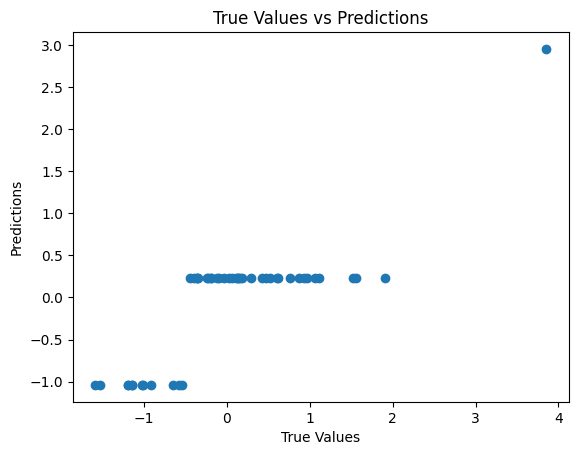

In [109]:
# Visualization
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

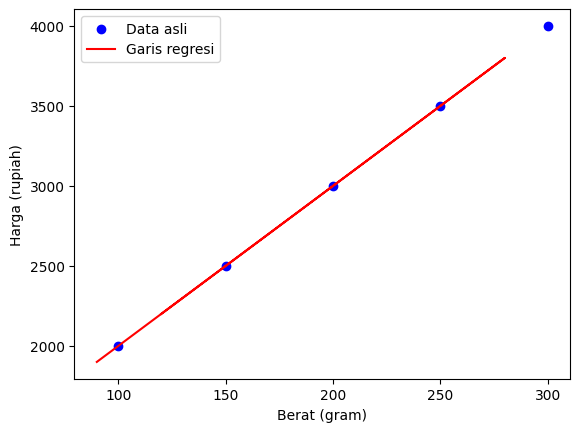

In [5]:

# Data contoh: Berat (gram) dan Harga (rupiah)
berat = np.array([100, 150, 200, 250, 300]).reshape(-1, 1)
harga = np.array([2000, 2500, 3000, 3500, 4000])

# Membuat model linear regression
model = LinearRegression()
model.fit(berat, harga)

# Prediksi harga berdasarkan berat
berat_baru = np.array([120, 180, 220, 280,90]).reshape(-1, 1)
harga_prediksi = model.predict(berat_baru)

# Plot hasil
plt.scatter(berat, harga, color='blue', label='Data asli')
plt.plot(berat_baru, harga_prediksi, color='red', label='Garis regresi')
plt.xlabel('Berat (gram)')
plt.ylabel('Harga (rupiah)')
plt.legend()
plt.show()